In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [4]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', x_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


In [5]:
X_train = X_train.astype('float32')
X_test  = x_test.astype('float32')
X_valid = X_valid.astype('float32')

X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
def create_resnet():
    inputs = layers.Input(shape=(32, 32, 3))

    # Initial convolutional layer
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)

    # First residual block
    for _ in range(2):
        residual = x
        x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(64, (3, 3), padding='same', activation=None)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Add()([x, residual])
        x = layers.ReLU()(x)

    # Second residual block
    x = layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    for _ in range(2):
        residual = x
        x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(128, (3, 3), padding='same', activation=None)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Add()([x, residual])
        x = layers.ReLU()(x)

    # Global average pooling and output
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

In [8]:
model = create_resnet()

In [9]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 64)     │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 32, 32, 64)     │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 32, 32, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 32, 32, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 64)     │            256 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 32, 32, 64)     │              0 │ batch_normalization_4… │
│                           │                        │                │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 32, 32, 64)     │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 16, 16, 128)    │         73,856 │ re_lu_1[0][0]          │
├──────────────────────

 Total params: 818,826 (3.12 MB)

 Trainable params: 816,906 (3.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [12]:
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[stop_early]
)

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 42ms/step - accuracy: 0.4631 - loss: 1.4846 - val_accuracy: 0.5824 - val_loss: 1.2411
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.7094 - loss: 0.8286 - val_accuracy: 0.6994 - val_loss: 0.8440
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.7819 - loss: 0.6254 - val_accuracy: 0.6378 - val_loss: 1.1032
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.8312 - loss: 0.4911 - val_accuracy: 0.7188 - val_loss: 0.8628
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.8663 - loss: 0.4052 - val_accuracy: 0.8018 - val_loss: 0.5804
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.8845 - loss: 0.3434 - val_accuracy: 0.7444 - val_loss: 0.8016
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9075 - loss: 0.2788 - val_accuracy: 0.7232 - val_loss: 0.9045
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.9292 - loss: 0.2181 - 

In [14]:
model.save('/content/drive/MyDrive/cifar10_models/cifar10_base.h5')

In [15]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Ensure y_true is in the correct shape (integer labels, not one-hot encoded)
y_true = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


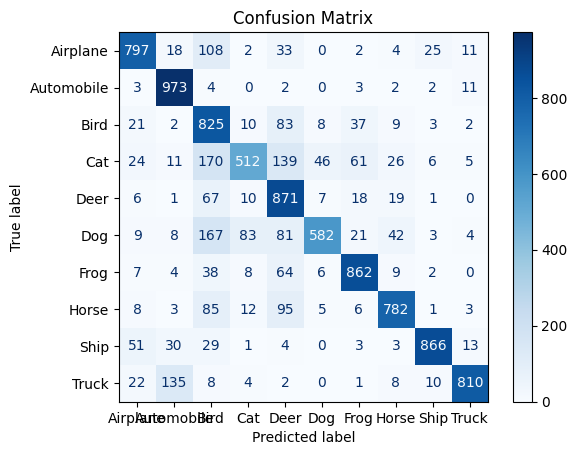

              precision    recall  f1-score   support

    Airplane       0.84      0.80      0.82      1000
  Automobile       0.82      0.97      0.89      1000
        Bird       0.55      0.82      0.66      1000
         Cat       0.80      0.51      0.62      1000
        Deer       0.63      0.87      0.73      1000
         Dog       0.89      0.58      0.70      1000
        Frog       0.85      0.86      0.86      1000
       Horse       0.87      0.78      0.82      1000
        Ship       0.94      0.87      0.90      1000
       Truck       0.94      0.81      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000



In [16]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Define class labels (modify these according to your dataset)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=labels))
